<a href="https://colab.research.google.com/github/subaruosawa/network-analyze/blob/main/around_comunity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120193 sha256=7e75d802bf76f690d71dbd5db54e368b42f98d5bd9e285a8d08298b48d9c1d2d
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [ ]:
import json
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import japanize_matplotlib
from community import community_louvain
import community

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [ ]:
with open("/content/drive/My Drive/jaccard_fin.json") as f:
  jaccard = json.load(f)
with open("/content/drive/My Drive/flow_fin.json") as f:
  flow = json.load(f)
with open("/content/drive/My Drive/aId_3rd_finset.json") as f:
  aId = json.load(f)
with open("/content/drive/My Drive/mean.json") as f:
  mean = json.load(f)
with open("/content/drive/My Drive/entry.json") as f:
  entry = json.load(f)
with open("/content/drive/My Drive/liver_sex.json") as f:
  sex = json.load(f)
with open("/content/drive/My Drive/liver_debut.json") as f:
  debut_str = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  real_name = json.load(f)

In [ ]:
debut = []
for i in debut_str:
  debut.append(datetime.datetime.now(datetime.timezone(datetime.timedelta(hours=9))).date()
   - datetime.datetime.strptime(i,'%Y-%m-%d').date())

In [ ]:
with open("/content/drive/My Drive/real_name.json") as f:
  name_alpha = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  name_beta = json.load(f)

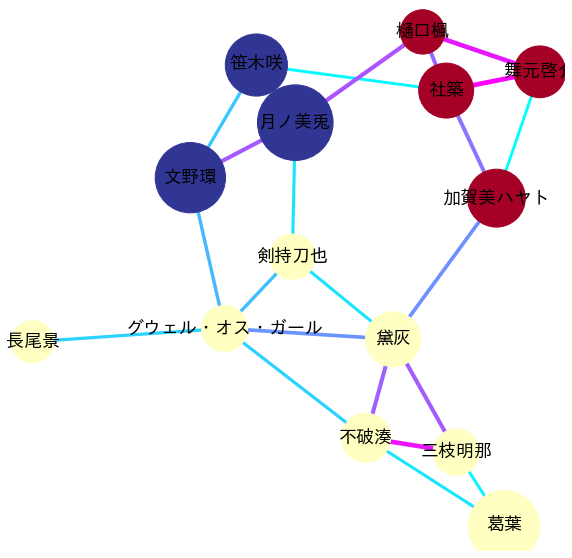

In [ ]:
G = nx.Graph()

for i in range(106):
  G.add_node(real_name[i],
             count = len(aId[i]),
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])

n = 0
del name_alpha[-1]
del name_beta[0]
for alpha in name_alpha:
  for beta in name_beta:
    if not jaccard[3][n] == 0: 
      G.add_edge(alpha,beta,weight = jaccard[3][n])
    n += 1
  del name_beta[0]

#オプション：デビュー時期
#for n,d in list(G.nodes(data=True)):
  #if d["sex"] == "man":
    #G.remove_node(n)

#オプション：性別
#for n,d in list(G.nodes(data=True)):
  #if d["debut"] >= datetime.timedelta(365):
    #G.remove_node(n)

for u,v,d in list(G.edges(data=True)):
  if d["weight"] <= 0.029:
    G.remove_edge(u,v)

input = "黛灰"
first_adj = []
for na in G.adj[input].keys():
  first_adj.append(na)
second_adj = []
for inp in first_adj:
  for nam in G.adj[inp].keys():
    second_adj.append(nam)
adj_set = list(set([input]+first_adj+second_adj))
for u,v in list(G.edges):
  if not u in adj_set:
    if not v in adj_set:
      G.remove_edge(u,v)


for name,deg in list(G.degree):
  if deg <= 2:
    G.remove_node(name)


################################################################################
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, k=0.2)
deg = nx.degree_centrality(G).values()
partition=community.best_partition(G)
nx.draw_networkx(G, pos, with_labels=True,font_family="IPAexGothic",font_size=18)
cliques = nx.find_cliques(G)

node_size = [ d["count"]**1.1 for (n,d) in G.nodes(data=True)]
nx.draw_networkx_nodes(G, pos, node_size=node_size,
                       #node_color=list(deg),
                       node_color=list(partition.values()),
                       cmap=plt.cm.RdYlBu
                       )  
edge_width = [ d['weight']*100 for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()

In [ ]:
with open("/content/drive/My Drive/real_name.json") as f:
  name_alpha = json.load(f)
with open("/content/drive/My Drive/real_name.json") as f:
  name_beta = json.load(f)

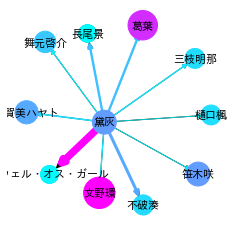

In [ ]:
DG = nx.DiGraph()

for i in range(106):
  DG.add_node(name_alpha[i],
             count = mean[2][i],
             sex = sex[i],
             debut = debut[i],
             name = real_name[i])
  
n = 0
del name_alpha[-1]
del name_beta[0]
for alpha in name_alpha:
  for beta in name_beta:
    if flow[2][n] > 0:
      DG.add_edge(alpha,beta,weight = flow[2][n])
    elif flow[2][n] < 0:
      DG.add_edge(beta,alpha,weight = -flow[2][n])         
    n += 1
  del name_beta[0]

for u,v in list(DG.edges):
  if v == "黛灰":
    DG.remove_edge(u,v)
  elif not u == "黛灰":
    if not v == "黛灰":
      DG.remove_edge(u,v)

for u,v in list(DG.edges):
  if not u in list(G.nodes):
    DG.remove_edge(u,v)
  elif not v in list(G.nodes):
    DG.remove_edge(u,v)


for u,v,d in list(DG.edges(data=True)):
  if d["weight"] <= 5:
    DG.remove_edge(u,v)

#input = "黛灰"
#first_adj = []
#for na in DG.adj[input].keys():
  #first_adj.append(na)
#second_adj = []
#for inp in first_adj:
  #for nam in DG.adj[inp].keys():
    #second_adj.append(nam)
#adj_set = list(set([input]+first_adj+second_adj))
#for u,v in list(DG.edges):
  #if not u in adj_set:
    #if not v in adj_set:
      #DG.remove_edge(u,v)

for name,deg in list(DG.degree):
  if deg <= 0:
    DG.remove_node(name)

################################################################################
plt.figure(figsize=(4,4))
pos = nx.spring_layout(DG, k=0.2)
deg = nx.degree_centrality(DG).values()
nx.draw_networkx(DG, pos, with_labels=True,font_family="IPAexGothic",font_size=11)

node_size = [ d["count"]/2.5 for (n,d) in DG.nodes(data=True)]
nx.draw_networkx_nodes(DG, pos, node_size=node_size, node_color=node_size, cmap=plt.cm.cool)
edge_width = [ d['weight']/8 for (u,v,d) in DG.edges(data=True)]
nx.draw_networkx_edges(DG, pos,edge_color=edge_width, width=edge_width, edge_cmap=plt.cm.cool)

plt.axis('off')
plt.show()